In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import os
import csv
import cv2

In [ ]:
def preprocess_image(image: Image) -> Image:
    image = ImageOps.grayscale(image)  # convert to grayscale first so padding is less expensive, might be a large image
    dim = max(image.size)  # Find the largest dimension
    new_dim = 2 ** int(math.ceil(math.log(dim, 2)))  # Find the next power of 2
    return ImageOps.pad(image, (new_dim, new_dim))

In [ ]:
def create_framework_matrix(a: np.array) -> np.array:
    framework_matrix = [[0 for x in range(256)] for x in range(256)]
    framework_matrix = np.array(framework_matrix)

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if j == 0:
                continue
            else:
                prev = a[i][j - 1]
                current = a[i][j]
                framework_matrix[prev][current] += 1

    return framework_matrix

In [ ]:
def contrast(a: np.array) -> float:
    c = 0

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            c += a[i][j] * (i - j) * (i - j)

    return c

In [ ]:
def homogeneity(a: np.array) -> float:
    h = 0

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            h += a[i][j] / (1 + (i - j) * (i - j))

    return h

In [ ]:
def entropy(a: np.array) -> float:
    e = 0

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if (a[i][j] <= 0):
                continue
            else:
                e += a[i][j] * math.log(a[i][j])

    return (-1) * e

In [ ]:
def dissimilarity(a: np.array) -> float:
    d = 0

    for i in range(a.shape[0]):
      for j in range(a.shape[1]):
        d += a[i][j] * abs(i - j)

    return d

In [ ]:
def asm(a: np.array) -> float:
    a = 0

    for i in range(a.shape[0]):
      for j in range(a.shape[1]):
        a += a[i][j] * a[i][j]

    return a

In [ ]:
def correlation(a: np.array) -> float:
  #https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4153941/
    co = 0
    mu_x = 0
    mu_y = 0
    sigma_x = 0
    sigma_y = 0

    for i in range(a.shape[0]):
      for j in range(a.shape[1]):
        mu_x += i * a[i][j]
        mu_y += j * a[i][j]

    for i in range(a.shape[0]):
      for j in range(a.shape[1]):
        sigma_x += (i - mu_x) * (i - mu_x) * a[i][j]
        sigma_y += ((j - mu_y) * (j - mu_y) * a[i][j])

    sigma_x = math.sqrt(sigma_x)
    sigma_y = math.sqrt(sigma_y)

    for i in range(a.shape[0]):
      for j in range(a.shape[1]):
        co += ((i - mu_x) * (j - mu_y) * a[i][j]) / (sigma_x * sigma_y)

    return co


In [ ]:
def inverse_contrast(a: np.array) -> float:
    ic = 0

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            ic += a[i][j] / ((i - j) * (i - j))

    return ic

In [ ]:
def distortion(a: np.array) -> float:
    dt = 0

    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            dt += a[i][j] * ((i - j) * (i - j) * (i - j))

    return dt

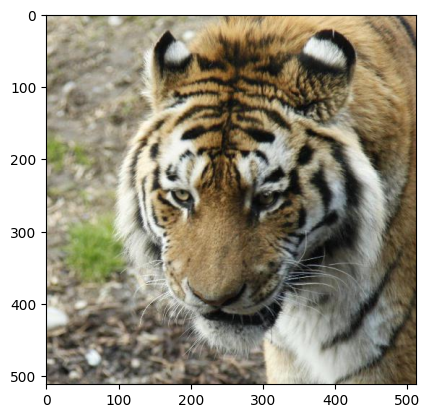

In [ ]:
img1 = Image.open("../../test/dataset/0.jpg")
plt.imshow(img1)
plt.show()

In [ ]:
img2 = Image.open('../../test/dataset/1.jpg')

In [ ]:
def save_csv(dir):
    filenames = os.listdir(dir)
    sorted_filenames = sorted(filenames, key=lambda x: int(x.split('.')[0]))

    images = []
    for filename in sorted_filenames:
        img = Image.open(os.path.join(dir,filename))
        if img is not None:
            framework_matrix = create_framework_matrix(np.array(preprocess_image(img)))
            symmetric_matrix = framework_matrix + framework_matrix.transpose()
            symmetric_matrix_normalized = symmetric_matrix / symmetric_matrix.sum()

            c, h, e, d, a, en, co, ic, dt = contrast(symmetric_matrix_normalized), homogeneity(symmetric_matrix_normalized), entropy(symmetric_matrix_normalized), dissimilarity(symmetric_matrix_normalized), asm(symmetric_matrix_normalized), math.sqrt(asm(symmetric_matrix_normalized)), correlation(symmetric_matrix_normalized), inverse_contrast(symmetric_matrix_normalized), distortion(symmetric_matrix_normalized)
            images.append([c, h, e, d, a, en, co, ic, dt])

    with open("../../test/dataset_textures.csv", 'w', newline='') as file:
        csv_writer = csv.writer(file)
        csv_writer.writerows(images)

In [ ]:
def load_csv(filename):
    lines = ""
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Process each line to convert it into a NumPy array of shape (16, 72)
    arrays = []
    for line in lines:
        values = list(map(float, line.strip().split(',')))
        arrays.append(values)
    return arrays

In [ ]:
save_csv("../../test/dataset")

In [ ]:
db = load_csv("../../test/dataset_textures.csv")

In [ ]:
db

[[129.22168924290827, 0.16677493313988725, 9.024749030191739],
 [136.06717450464976, 0.2648806077339885, 8.73596216113938],
 [111.97849651418996, 0.2145767757494852, 8.73396854407713],
 [65.36553250366926, 0.292776895299118, 7.889859290220855],
 [1327.0385235750741, 0.17312587629854095, 8.89626464752304],
 [73.3030516144819, 0.1812046930641131, 8.534104940081162],
 [91.12003501100952, 0.2374672303614745, 8.59461345181843],
 [566.5542135518732, 0.30889905538863865, 8.48374023686919],
 [52.87208751223223, 0.34520842256102785, 8.078784969284756],
 [133.96167135518917, 0.2154904851870471, 9.0233714708442],
 [204.63313738380967, 0.25830150308935507, 8.840987063753985],
 [575.9813440252022, 0.12689573168435628, 9.594224467079188],
 [112.58775684931709, 0.23889335396987277, 8.793169739449462],
 [133.79765089897552, 0.2769729860925472, 8.658847984942915],
 [93.98932852250704, 0.3646185735767197, 8.185382155316754],
 [69.36284170132231, 0.2516424011825613, 8.364294150613157],
 [586.613766664636

In [ ]:
def cosine_similarity(c1, h1, e1, d1, a1, en1, co1, ic1, dt1, c2, h2, e2, d2, a2, en2, co2, ic2, dt2):
    cosine = ((c1 * c2) + (h1 * h2) + (e1 * e2) + (d1 * d2) + (a1 * a2) + (en1 * en2) + (co1 * co2) + (ic1 * ic2) + (dt1 * dt2)) / (math.sqrt(pow(c1, 2) + pow(h1, 2) + pow(e1, 2) + pow(d1, 2) + pow(a1, 2) + pow(en1, 2) + pow(co1, 2) + pow(ic1, 2) + pow(dt1, 2)) * math.sqrt(pow(c2, 2) + pow(h2, 2) + pow(e2, 2)  + pow(d2, 2) + pow(a2, 2) + pow(en2, 2) + pow(co2, 2) + pow(ic2, 2) + pow(dt2, 2)))

    return cosine * 100

In [ ]:
def search(c1, h1, e1, d1, a1, en1, co1, ic1, dt1):
    res60 = {}
    for i in range(len(db)):
        c2, h2, e2, d2, a2, en2, co2, ic2, dt2 = db[i][0], db[i][1], db[i][2], db[i][3], db[i][4], db[i][5], db[i][6], db[i][7], db[i][8]
        similarity = cosine_similarity(c1, h1, e1, d1, a1, en1, co1, ic1, dt1, c2, h2, e2, d2, a2, en2, co2, ic2, dt2)
        if similarity >= 60:
            res60[i] = similarity

    sorted_res = dict(sorted(res60.items(), key=lambda item: item[1], reverse=True))
    return sorted_res

In [ ]:
img = Image.open("../../test/dataset/265.jpg")
framework_matrix = create_framework_matrix(np.array(preprocess_image(img)))
symmetric_matrix = framework_matrix + framework_matrix.transpose()
symmetric_matrix_normalized = symmetric_matrix / symmetric_matrix.sum()

c, h, e, d, a, en, co, ic, dt = contrast(symmetric_matrix_normalized), homogeneity(symmetric_matrix_normalized), entropy(symmetric_matrix_normalized), dissimilarity(symmetric_matrix_normalized), asm(symmetric_matrix_normalized), math.sqrt(asm(symmetric_matrix_normalized)), correlation(symmetric_matrix_normalized), inverse_contrast(symmetric_matrix_normalized), distortion(symmetric_matrix_normalized)
res = search(c, h, e, d, a, en, co, ic, dt)

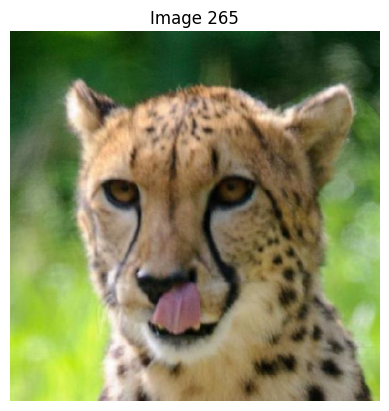

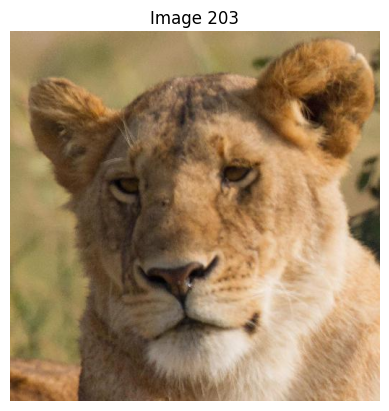

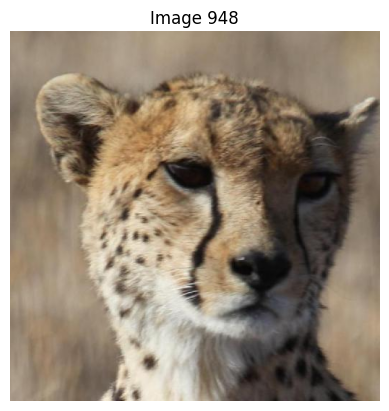

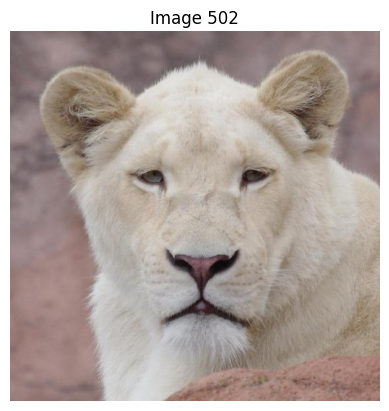

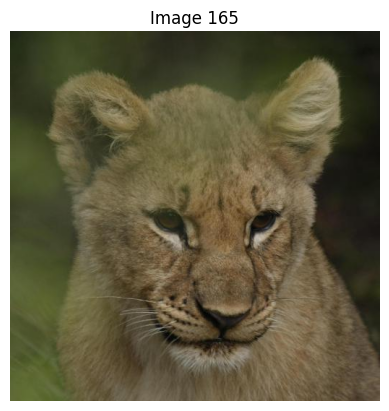

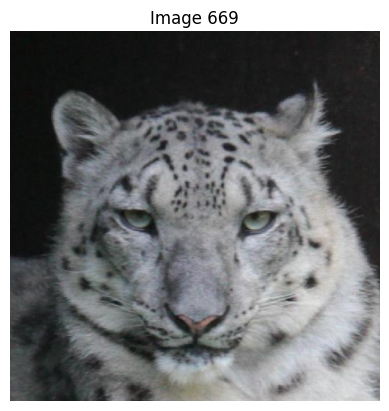

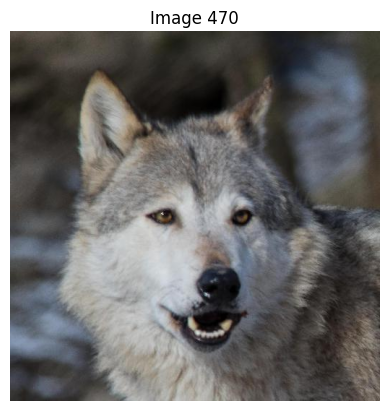

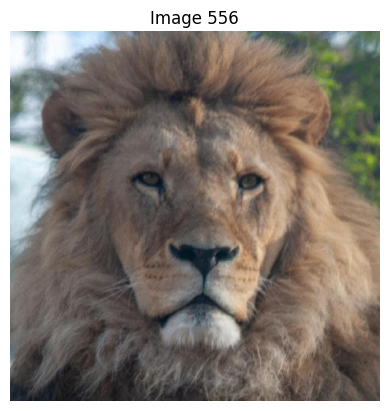

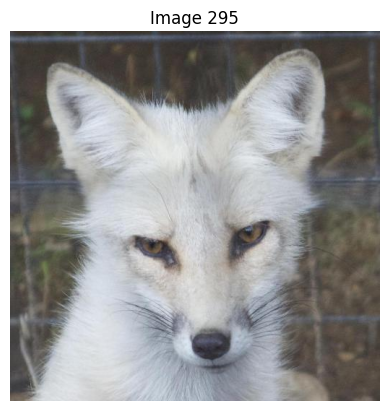

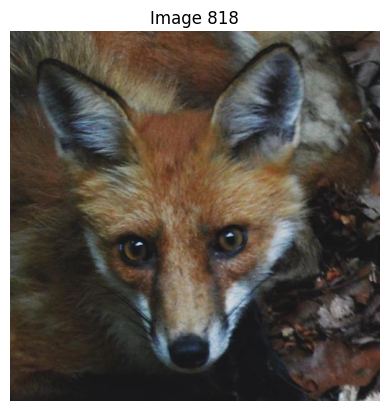

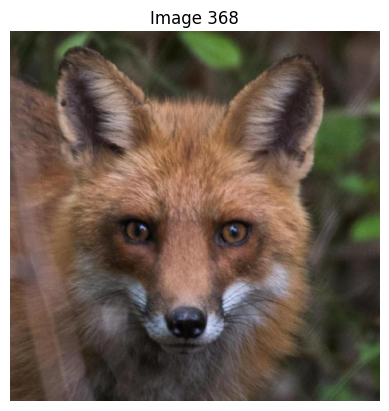

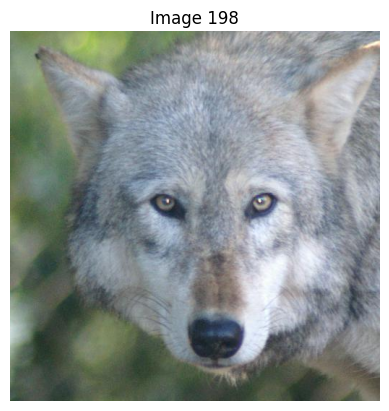

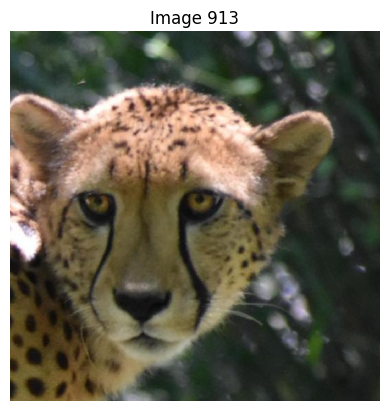

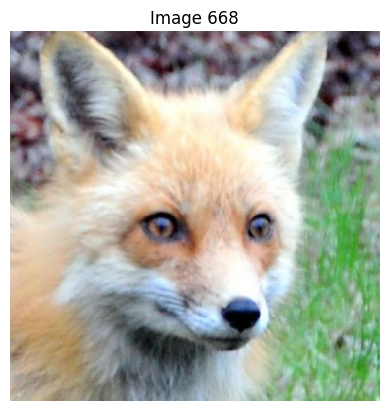

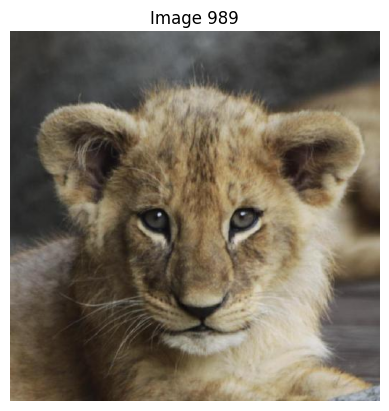

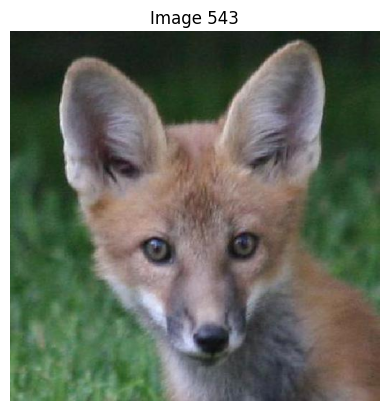

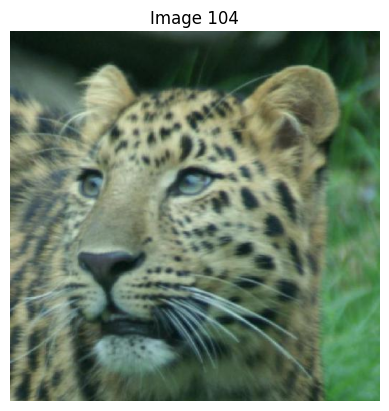

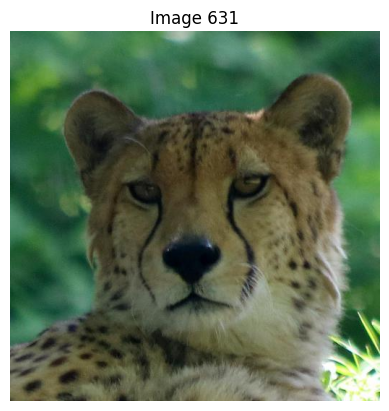

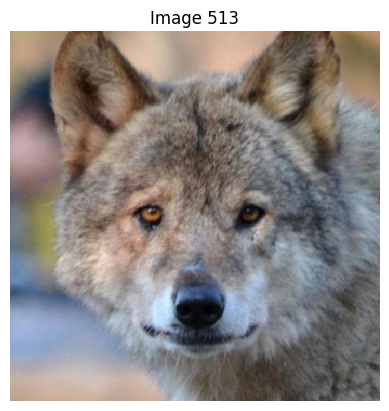

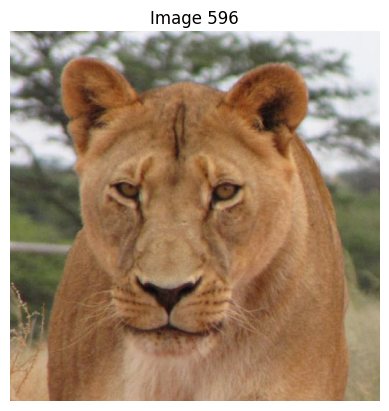

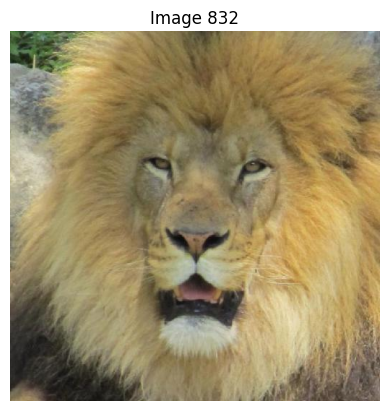

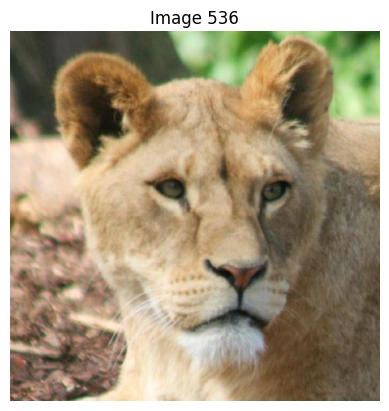

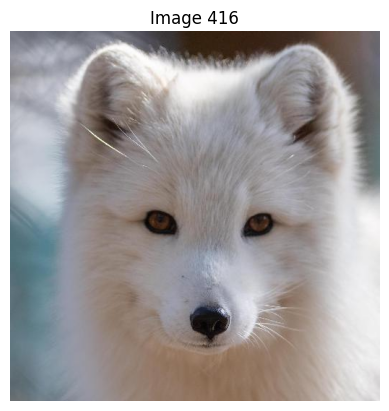

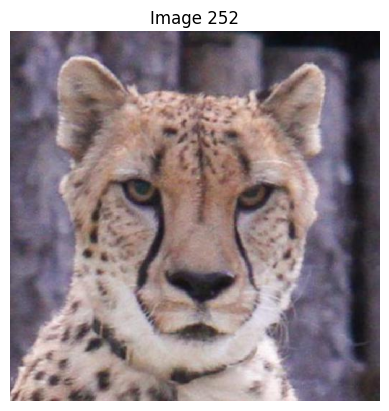

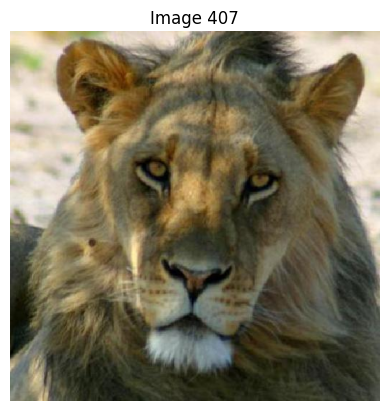

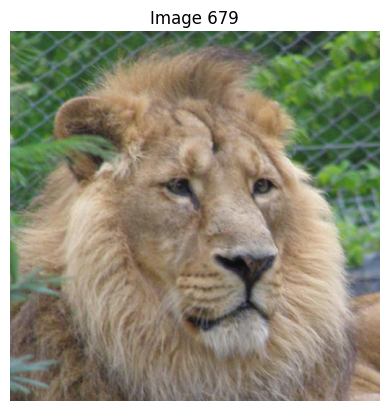

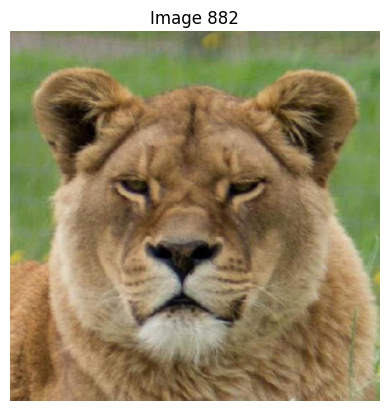

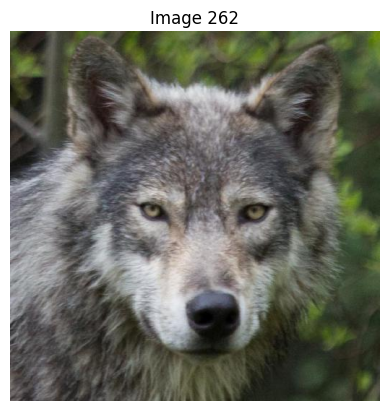

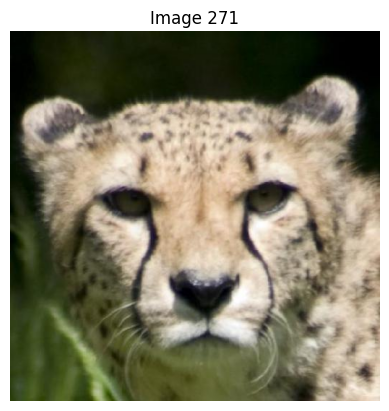

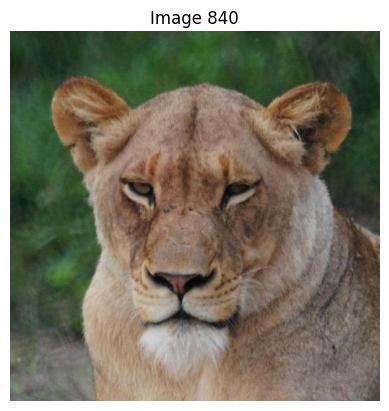

KeyboardInterrupt: 

In [ ]:
for number in res:
    file_path = "../../test/dataset/" + str(number) + ".jpg"  # Assuming images are named as 0.jpg, 1.jpg, ...
    img = mpimg.imread(file_path)  # Read the image file
    plt.imshow(img)  # Display the image
    plt.title(f"Image {number}")
    plt.axis('off')  # Hide axes
    plt.show()